In [408]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import difflib

## Billboardcharts

In [411]:
url= "https://www.billboard.com/charts/hot-100"

response = requests.get(url)
response.status_code # 200 status code means OK!

soup = BeautifulSoup(response.content, "html.parser")

In [412]:
song=[]
artist=[]
lastweek=[]
peak=[]
oncharts=[]

In [413]:
for i in range (len(soup.select(".chart-element__information"))):
    chart=soup.select(".chart-element__information")[i].get_text().split("\n")
    
    song.append(chart[1])
    artist.append(chart[2])
    lastweek.append(chart[5])
    peak.append(chart[6])
    oncharts.append(chart[7])

In [414]:
p = re.compile("\d+")


oncharts = list(map(lambda x: int(p.search(x).group(0)),oncharts))
peak = list(map(lambda x: int(p.search(x).group(0)),peak))
lastweek = list(map(lambda x:x.replace("Last Week",""),lastweek))
rank=range(1,101)

In [415]:
# each list becomes a column
top100 = pd.DataFrame({"rank":rank,
                       "song":song,
                       "artist":artist,
                       "lastweek":lastweek,
                       "peak": peak,
                       "oncharts":oncharts
                      })

top100.head()

,rank,song,artist,lastweek,peak,oncharts
0,1,Drivers License,Olivia Rodrigo,1,1,6
1,2,34+35,Ariana Grande,6,2,16
2,3,Calling My Phone,Lil Tjay Featuring 6LACK,-,3,1
3,4,Blinding Lights,The Weeknd,3,1,63
4,5,Up,Cardi B,2,2,2


## Wikipedia top 100

In [416]:
url1= "https://en.wikipedia.org/wiki/Triple_J_Hottest_100"
response1 = requests.get(url1)
response1.status_code # 200 status code means OK!
soupe = BeautifulSoup(response1.content, "html.parser")

In [524]:
tops=[]
for i in range (len(soupe.find_all("ol"))):
    top=soupe.find_all("ol")[i].get_text().split("\n")
    if len(top)==10:
        for p in top:
            tops.append(p)
    else:
        pass
        
tops
      

['Joy Division – "Love Will Tear Us Apart" (1980)',
 'Hunters & Collectors – "Throw Your Arms Around Me" (1985)',
 'The The – "Uncertain Smile" (1983)',
 'The Jam – "That\'s Entertainment" (1980)',
 'New Order – "Blue Monday" (1983)',
 'Dead Kennedys – "Holiday in Cambodia" (1980)',
 'The Smiths – "How Soon Is Now?" (1984)',
 'Hunters & Collectors – "Talking to a Stranger" (1982)',
 'The Sugarcubes – "Birthday" (1987)',
 'The Cure – "A Forest" (1980)',
 'Joy Division – "Love Will Tear Us Apart" (1980)',
 'Hunters & Collectors – "Throw Your Arms Around Me" (1985)',
 'The Smiths – "How Soon Is Now?" (1984)',
 'The The – "Uncertain Smile" (1983)',
 'New Order – "Blue Monday" (1983)',
 'The Stone Roses – "Fools Gold" (1989)',
 'The Smiths – "This Charming Man" (1983)',
 'The B-52\'s – "Rock Lobster" (1979)',
 'R.E.M. – "It\'s the End of the World as We Know It (And I Feel Fine)" (1987)',
 'The Jam – "That\'s Entertainment" (1980)',
 'Nirvana – "Smells Like Teen Spirit" (1991)',
 'Joy Divis

In [534]:
band=[]
Song=[]
for track in tops:
    row=track.split(" – ")
    band.append(row[0])
    
    s=row[1].split("(")
    n=s[0].replace('"',"")
    Song.append(n)


In [536]:
alltime=pd.DataFrame({ 
                      "song": Song,
    "band":band
    
})

In [564]:
alltime


,song,band
0,Love Will Tear Us Apart,Joy Division
1,Throw Your Arms Around Me,Hunters & Collectors
2,Uncertain Smile,The The
3,That's Entertainment,The Jam
4,Blue Monday,New Order
...,...,...
355,WAP,Cardi B and Megan Thee Stallion
356,Hyperfine,G Flip
357,Sending Me Ur Loving,The Jungle Giants
358,I'm Good?,Hilltop Hoods


## Recomender

In [422]:
top100["song"]=top100["song"].apply(lambda x: x.lower())
top100["artist"]=top100["artist"].apply(lambda x: x.lower())
alltime["song"]=alltime["song"].apply(lambda x: x.lower())
alltime["band"]=alltime["band"].apply(lambda x: x.lower())

#top100.drop(["rank","lastweek","peak","oncharts"],axis=1,inplace=True)



In [344]:
difflib.get_close_matches('the thw', alltime["band"])

['thethe', 'thethe', 'thesmiths']

## Spotify API

In [ ]:
#!pip install spotipy

In [565]:

import sys
#sys.path.insert(1, '/content/drive/MyDrive/credentials/')
from credentials import *

import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=ID,
                                                           client_secret=Secret))

In [566]:
playlist = sp.user_playlist_tracks("spotify", "7htu5ftbLBRFAwiuHVcUAg")

In [568]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks




In [80]:
def features(tracks):
    song_features = {}
    for i in range(len(tracks)):
        song_features[tracks[i]['track']['name']] = sp.audio_features(tracks[i]["track"]["uri"])
    return song_features

In [84]:
Features=features(tracks)

In [88]:
import pandas as pd

In [571]:

songsF=pd.DataFrame(Features.values())

In [572]:
songsF["names"]=Features.keys()

In [573]:
songsF[["names",0]]

,names,0
0,Ribs,"{'danceability': 0.511, 'energy': 0.472, 'key'..."
1,Bags,"{'danceability': 0.742, 'energy': 0.546, 'key'..."
2,The Man Who Can't Be Moved,"{'danceability': 0.609, 'energy': 0.629, 'key'..."
3,Rolling in the Deep,"{'danceability': 0.73, 'energy': 0.77, 'key': ..."
4,Grenade,"{'danceability': 0.706, 'energy': 0.558, 'key'..."
...,...,...
8642,"In The City - From ""The Warriors"" Soundtrack","{'danceability': 0.468, 'energy': 0.677, 'key'..."
8643,Dream A Little Dream,"{'danceability': 0.415, 'energy': 0.339, 'key'..."
8644,Can't Take My Eyes Off You x MAKE UP FOR EVER,"{'danceability': 0.494, 'energy': 0.531, 'key'..."
8645,Штрихи,"{'danceability': 0.534, 'energy': 0.802, 'key'..."


In [125]:
test=['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']

In [128]:
danceability=[]
energy=[]
loudness=[]
mode=[]
speechiness=[]
acousticness=[]
instrumentalness=[]
liveness=[]
valence=[]
tempo=[]
duration_ms=[]

In [139]:
for f in Features.keys():
    danceability.append(Features[f][0]["danceability"])
    energy.append(Features[f][0]["energy"])
    loudness.append(Features[f][0]["loudness"])
    mode.append(Features[f][0]["mode"])
    speechiness.append(Features[f][0]["speechiness"])
    acousticness.append(Features[f][0]["acousticness"])
    instrumentalness.append(Features[f][0]["instrumentalness"])
    liveness.append(Features[f][0]["liveness"])
    valence.append(Features[f][0]["valence"])
    tempo.append(Features[f][0]["tempo"])
    duration_ms.append(Features[f][0]["duration_ms"])

    
    

In [148]:
names=list(Features.keys())


In [577]:
Songf=pd.DataFrame({"song":names,"energy":energy,
"loudness":loudness,
"mode":mode,
"speechiness":speechiness,
"acousticness":acousticness,
"instrumentalness":instrumentalness,
"liveness":liveness,
"valence":valence,
"tempo":tempo,
"duration_ms":duration_ms                   
                   
                   }
                  )

## clustering

In [575]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [578]:
Songf.set_index("song",inplace=True)

In [579]:
X_prep = StandardScaler().fit_transform(Songf)

In [580]:
kmeans = KMeans(n_clusters=12, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=12, random_state=1234)

In [581]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0      442
1      855
2      369
3      999
4      651
5     1324
6       84
7      417
8      937
9      271
10    1318
11     980
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

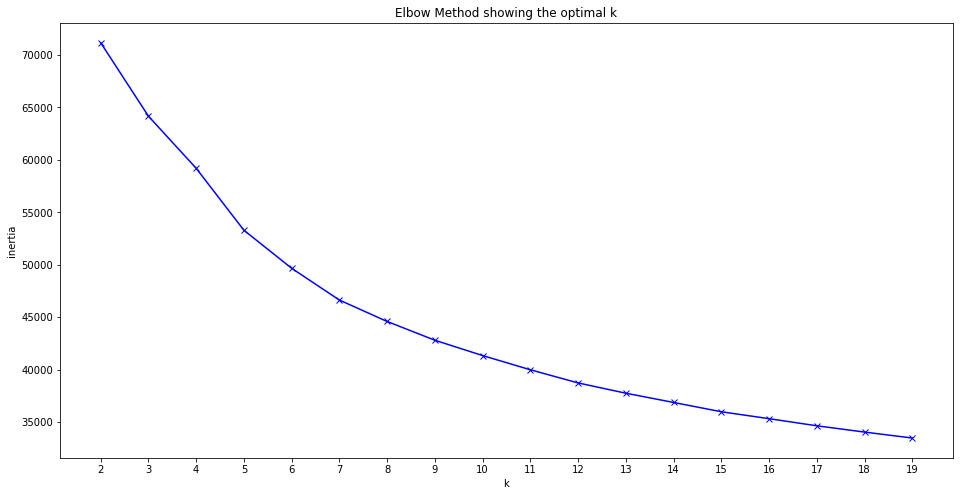

In [582]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

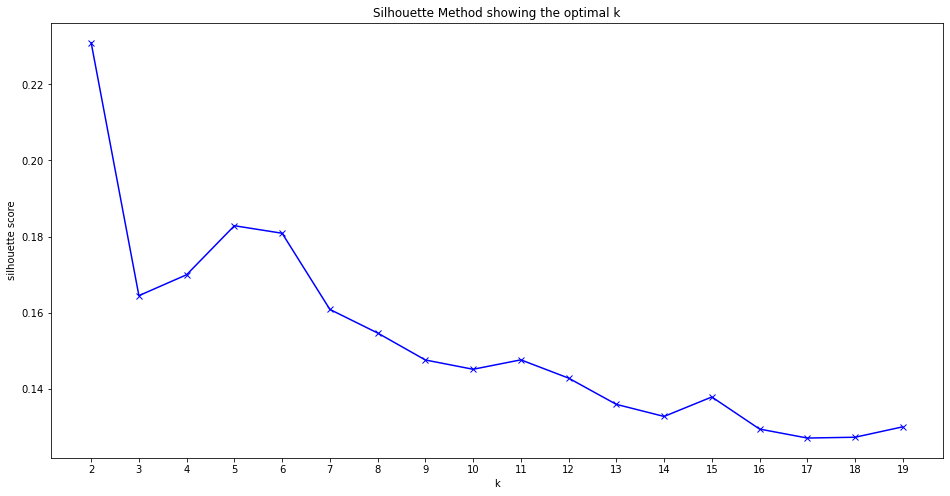

In [169]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Kaggle dataset

In [658]:
kaggel=pd.read_csv("data.csv")

In [661]:
kaggel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   danceability      174389 non-null  float64
 2   energy            174389 non-null  float64
 3   id                174389 non-null  object 
 4   instrumentalness  174389 non-null  float64
 5   liveness          174389 non-null  float64
 6   loudness          174389 non-null  float64
 7   speechiness       174389 non-null  float64
 8   tempo             174389 non-null  float64
 9   valence           174389 non-null  float64
dtypes: float64(9), object(1)
memory usage: 13.3+ MB


In [660]:
kaggel.drop(['explicit','key','mode', 'name','popularity','release_date', 'year','artists','duration_ms'],axis=1, inplace=True)

In [662]:
kaggel.set_index("id",inplace=True)

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [663]:
scaler_x = StandardScaler().fit(kaggel)
kaggel_scaled=scaler_x.transform(kaggel)

In [664]:
kmeans = KMeans(n_clusters=26, random_state=1234)
kmeans.fit(kaggel_scaled)


KMeans(n_clusters=26, random_state=1234)

In [665]:
clusters = kmeans.predict(kaggel_scaled)
pd.Series(clusters).value_counts().sort_index()

0      9823
1     10613
2      6944
3      9851
4      6231
5      8760
6      9546
7      8880
8      4394
9      6741
10     8183
11     8929
12     4393
13      918
14     7941
15     5509
16     5707
17     7876
18     4757
19     2813
20     6207
21     7598
22     5014
23     6124
24     6648
25     3989
dtype: int64

In [666]:
c=pd.DataFrame(clusters)

In [667]:
c.index=kaggel.index

In [668]:
kaggel.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
id,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0.0936,149.976,0.6340
0hbkKFIJm7Z05H8Zl9w30f,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0.0534,86.889,0.9500
11m7laMUgmOKqI3oYzuhne,0.993000,0.647,0.186,0.000018,0.5190,-12.098,0.1740,97.600,0.6890
19Lc5SfJJ5O1oaxY0fpwfh,0.000173,0.730,0.798,0.801000,0.1280,-7.311,0.0425,127.997,0.0422
2hJjbsLCytGsnAHfdsLejp,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0.0768,122.076,0.2990


In [669]:
kaggelcluster=pd.concat([kaggel,c],axis=1)

In [670]:
kaggelcluster.columns=['acousticness',     'danceability',
                 'energy', 'instrumentalness',         'liveness',
               'loudness',      'speechiness',            'tempo',
                'valence',    "cluster"]

In [671]:
export_csv = kaggelcluster.to_csv ('export_dataframe.csv')

In [675]:
kaggelcluster.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
id,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0.0936,149.976,0.6340,23
0hbkKFIJm7Z05H8Zl9w30f,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0.0534,86.889,0.9500,11
11m7laMUgmOKqI3oYzuhne,0.993000,0.647,0.186,0.000018,0.5190,-12.098,0.1740,97.600,0.6890,25
19Lc5SfJJ5O1oaxY0fpwfh,0.000173,0.730,0.798,0.801000,0.1280,-7.311,0.0425,127.997,0.0422,16
2hJjbsLCytGsnAHfdsLejp,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0.0768,122.076,0.2990,9


## Functions for recomender

In [646]:
end=("Thanks for using RobertsRecomendationRobot  RRR")

In [655]:
def Spotify():
    kunst=input("Which artist do you like? ")
    print("                                        ")
    lied=input("Any specific Song? if not leave it blank ")
    print("                                        ")
    tosearch=(kunst+" "+lied)
    kind=songrecomender(lied,tosearch)
    if kind == "Hot" or "classic":
        newsearch=input("Would you like to look on Spotify as well? ")
        if newsearch == "yes":
            again(tosearch)
           
        
                    
        else:
            print(end)

    elif kind == "spotify":
        print(end)
    else:
        print(end)
    return

In [656]:
def again (tosearch):
    kaggelrec(tosearch)
     
    newsearch=input("would you like to look for another song?")
    if newsearch == "yes":
        again(tosearch)
    else:
        print(end)
    return

In [673]:
def kaggelrec(tosearch) : 
    feat=sp.audio_features(sp.search(tosearch)["tracks"]["items"][0]["id"])
    songfeat=pd.json_normalize(feat)
    songfeat.set_index("id",inplace=True)
    songfeat1=songfeat[['acousticness',     'danceability',
                     'energy', 'instrumentalness','liveness',
                   'loudness',      'speechiness', 'tempo',
                    'valence']]
    
    
    songfeat_scaled=scaler_x.transform(songfeat1)
    cluster = int(kmeans.predict(songfeat_scaled))
    recsongid=kaggelcluster[kaggelcluster["cluster"]==cluster].sample().index.values.astype(object)[0]

    songinfos=sp.track(recsongid)
    
    
    print("                                        ")
    print("----------------------------------------")
    print("You will love the Song: ")
    print("{} - {}".format(songinfos["name"],songinfos["artists"][0]["name"]))
    print("----------------------------------------")
    print("You can find it here:")
    print(songinfos["external_urls"]["spotify"])
    return 

In [ ]:
def songrecomender(songname,tosearch):
    if songname in top100.values:
        newsong=top100.sample()
        print("                                        ")
        print("----------------------------------------")
        print("Your Song is incredibly HOT")
        print("                                        ")
        print("Maybe you also like this HOT Song:")
        print("----------------------------------------")
        print("{} - {}".format(newsong.iloc[0][0],newsong.iloc[0][1]))
        Hot="Hot"
        return Hot
    elif songname in alltime.values:
        newsong=alltime.sample()
        print("                                        ")
        print("----------------------------------------")
        print("You seem to like an oll time classic")
        print("                                        ")
        print("Maybe you also like this all time banger ")
        print("----------------------------------------")
        print("{} - {}".format(newsong.iloc[0][0],newsong.iloc[0][1]))
        Classic="classic"
        return  Classic
    else:
        
        print("Your Song is neither Hot or a classic so we will find you something on Spotify")
        print("                                        ")
        kaggelrec(tosearch)
        spot="spotify"
    return spot

## Roberts Recomendation Robot 

In [674]:
Spotify()

Which artist do you like? card
                                        
Any specific Song? if not leave it blank 
                                        
                                        
----------------------------------------
You seem to like an oll time classic
Maybe you also like this all time banger 
Take Me Over - Peking Duk featuring Safia
Would you like to look on Spotify as well? yes
                                        
----------------------------------------
You will love the Song: 
Karotseris - ANTONIS NTALGKAS
----------------------------------------
You can find it here:
https://open.spotify.com/track/36ukutBisc3CefUhyFSvCi
would you like to look for another song?no
Thanks for using RobertsRecomendationRobot  RRR


## Backup functions

In [402]:
def get_song_features(song_name):
    results = sp.search(q=song_name, limit=5)
    for singer in range(len(results["tracks"]["items"])):
        x = input("By this artist? {} ".format(results['tracks']['items'][singer]['artists'][0]['name'])).lower()
        if x == 'yes':
            features_find = results['tracks']['items'][singer]['uri']
            song_features = sp.audio_features(features_find)
            break
        elif x != 'yes':
            continue
    return song_features

In [270]:
def get_features(song_features): 
    song_id=list(song_features.keys()) 
    features=list(song_features[song_id[0]][0])
    feature_dict={}
    for i in range(len(features)):
        value_list=[]
        for n in range(len(song_features)): 
            result=song_features[song_id[n]][0][features[i]]
            value_list.append(result)
            #print(result)
            feature_dict[features[i]]=value_list
    df=pd.DataFrame.from_dict(feature_dict)
    return df

In [273]:
def features(tracks):
    song_features = {}
    for i in range(len(tracks)):
        song_features[tracks[i]["track"]["id"]] = sp.audio_features(tracks[i]["track"]["uri"])
    return song_features
#big_spotify=features(tracks)